<h1> A2: Regression Model Development (Individual) <h1\>

Assignment done by: Roger Lopez Benet

Course: Computational Business Analytics with Python

Professor: Chase Kusterer

Date: 2/19/2023

------------------------------------------------------
------------------------------------------------------
------------------------------------------------------

The Database:

A regression analysis using python’s machine learning models has been performed for the Apprentice Chef database. This database is composed of 200 customer data from Apprentice Chef’s already cooked and delivered meals service. The company offers this service for both, working busy professionals, and other busy people or even some that find the service convenient and good value exchange. 

The database is composed of 19 features, including ‘REVENUE’, which throughout the whole analysis has been used as the independent y-variable. And the rest, 18, features have been used as x-variables. Although there are 18 possible dependent variables available to us, only those that meet the criteria of being continuous with no null values have been used. That said, beyond this subset of data, another subset of variables explained later has been used. The variables used are the ones that drive our testing score up and keep the train-test GAP score between the allowed interval. 


The Variables:

This means that even though variables that have not been taken into account for this analysis, such as the categorical ones (‘NAME’, ‘EMAIL’, ‘FIRST_NAME’, ‘FAMILY_NAME’) and a continuous one, ‘LATE_DELIVERIES’. The reason why the categorical variables haven’t been used is mainly that they don’t add value to the assignment, since it’s data that yes if it is needed for identifying customers or clustering them into different groups based on their family names, it would be useful, but from a big data point of view, which is the approach we have taken, these are not useful enough, and the sample size for these is too small to take into consideration. 

Also, regarding email domains, these could have also been clustered into different smaller groups based on if they were professional, personal, or spam. This could have been an option and enriched our findings, although having in mind it would have probably negatively affected the regression analysis, these have been discarded. 

The reason why ‘LATE_DELIVERIES’ has been discarded is that it negatively affected both the regression and correlation analysis, because it is formed mainly of zeros, except for a couple of higher values. Therefore, since this one also had a very low correlation with ‘REVENUE’, the independent variable, it hasn’t been used. 


In [1]:
# Imported libraries
import pandas                  as pd        # data science essentials
import matplotlib.pyplot       as plt       # essential graphical output
import seaborn                 as sns       # enhanced graphical output
import numpy                   as np        # mathematical essentials

import statsmodels.formula.api as smf       # regression modeling

# Imported Machine learning model packages
import sklearn
from sklearn.tree            import DecisionTreeRegressor     # regression trees
from sklearn.tree            import plot_tree                 # tree plots
from sklearn.ensemble        import RandomForestRegressor     # random forest
from sklearn.ensemble        import GradientBoostingRegressor # gbm
from sklearn.model_selection import train_test_split          # train-test split



# Setting up Pandas options for print statements
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Selecting the database file and assigning it a name
file = 'Apprentice_Chef_Dataset_2023.xlsx'


# This reads the file into Python
chef = pd.read_excel(file)


# This code doesn't produce any output, because the goal here is to import all packages needed for the script, selecting the database file, and setting up the Pandas package

In [2]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [31]:
### Selecting the first 100 raws of data from the DataBase
chef.head(100)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LOG_REVENUE,LOG_TOTAL_MEALS_ORDERED,LOG_UNIQUE_MEALS_PURCH,LOG_CONTACTS_W_CUSTOMER_SERVICE,LOG_PRODUCT_CATEGORIES_VIEWED,LOG_AVG_TIME_PER_SITE_VISIT,LOG_PC_LOGINS,LOG_MOBILE_LOGINS,LOG_AVG_PREP_VID_TIME,LOG_LARGEST_ORDER_SIZE,LOG_AVG_MEAN_RATING,LOG_TOTAL_PHOTOS_VIEWED,AVG_TIME_VISIT_AND_MEALS_ORDERED,AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED,AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE,AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME,UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED,CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS,CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS,PC_LOGINS_AND_MOBILE_LOGINS
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,8.501064,6.200509,2.197225,0.0,2.302585,5.581991,1.609438,0.693147,4.922969,1.791759,1.062894,6.122493,758.6,721.6,271.6,403.01,19,10,7,7
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,8.724207,5.888878,2.197225,0.0,1.791759,5.509388,1.609438,0.000000,4.789157,1.609438,0.967584,6.522093,608.0,927.0,252.0,367.20,15,7,3,6
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,8.141772,5.627621,1.791759,0.0,1.386294,5.102302,1.791759,0.000000,4.844187,1.098612,1.304056,4.976734,442.4,309.4,167.4,291.40,10,6,1,7
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,8.110728,5.594711,2.079442,0.0,0.693147,5.170484,1.609438,0.693147,4.865841,1.791759,1.149906,6.035481,445.0,594.0,182.0,305.78,10,10,7,7
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,8.139586,5.620401,1.945910,0.0,2.302585,5.103518,1.791759,0.000000,3.538638,1.098612,1.149906,5.159055,440.6,338.6,167.6,199.02,17,6,1,7
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16,7.978482,5.505332,1.945910,0.0,0.693147,5.481888,1.609438,0.000000,5.484382,2.079442,1.498212,2.772589,486.3,256.3,248.3,481.20,9,6,2,6
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584,8.269116,5.755742,2.302585,0.0,1.609438,5.213848,1.609438,0.693147,4.941714,1.791759,1.149906,6.369901,499.8,767.8,189.8,323.81,15,7,4,7
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095,8.517193,5.525453,2.302585,0.0,0.000000,5.596939,1.609438,0.693147,4.962845,2.079442,1.062894,6.998510,520.6,1364.6,277.6,412.60,11,9,6,7
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198,8.035926,5.545177,1.945910,0.0,1.609438,5.386328,1.791759,0.000000,4.790321,1.791759,1.062894,5.288267,474.4,416.4,224.4,338.74,12,8,3,7
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664,8.656085,5.693732,2.079442,0.0,1.791759,5.586499,1.791759,0.000000,4.947908,2.079442,1.062894,6.498282,563.8,930.8,274.8,407.68,14,7,2,7


<h2> Checking how many null values each feature has <h2\>

As seen below, the number of null values for each variable in the database, later defined as ‘chef’, have been retrieved using the already defined python method. As can be seen, the result is no null values for any of the variables except for ‘FAMILY_NAME’. This validates the decision not to use it in the analysis. 

In [4]:
chef.isnull().sum(axis = 0) # By adding axis = 0, we get each column name and it sums the amound of null values for each of them

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [5]:
# For loop to print column names one by one
for column in chef:
    print(column)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


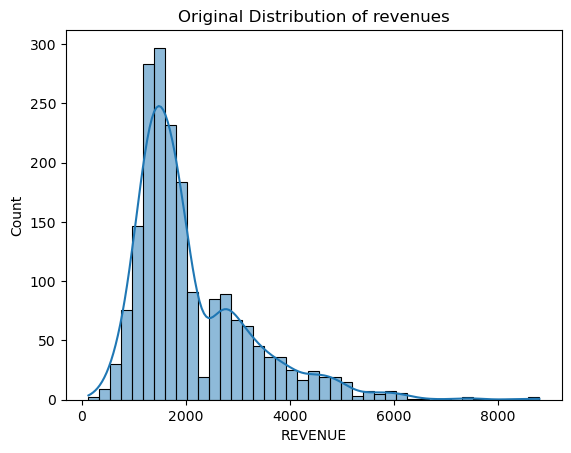

In [32]:
# developing a histogram using HISTPLOT
sns.histplot(data   = chef, # Assigning the data source
             x      = 'REVENUE', # Assigning the histoplot's x-axis 
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of revenues") # Defining Title 
plt.xlabel(xlabel = "REVENUE") # Assigning labels
plt.ylabel(ylabel = "Count") # Assigning labels

# displaying the histogram
plt.show()


Even though finding the correlations between the y-variable, ‘REVENUE’, and the rest of the variables, x-variables, does not directly influence the final regression scores or conclusion, it has given us a picture of how to approach the problem and has definitely provided an overview of each variable’s relation with ‘REVENUE’. The whole later regression analysis has been built on this. 

That said, only taking the raw data into account, the average time per site per visit variable scored the highest correlation score followed by total meals ordered and total photos viewed. Therefore, as also seen in the correlation matrix down below the strongest correlation variable, ‘AVG_TIME_PER_SITE_VISIT’, has been used later for engineering new features as well as used as a variable itself in the regression models. 


In [7]:
### Calculating the correlation of the chef dataset's variables

# A list of continuous features (including REVENUE)
continuous_data =  ['REVENUE',                     # Adding REVENUE variable
                    'TOTAL_MEALS_ORDERED',         # Adding TOTAL_MEALS_ORDERED variable
                    'UNIQUE_MEALS_PURCH',          # Adding UNIQUE_MEALS_PURCH variable
                    'CONTACTS_W_CUSTOMER_SERVICE', # Adding CONTACTS_W_CUSTOMER_SERVICE variable
                    'AVG_TIME_PER_SITE_VISIT',     # Adding AVG_TIME_PER_SITE_VISIT variable
                    'CANCELLATIONS_AFTER_NOON',    # Adding CANCELLATIONS_AFTER_NOON variable
                    'PC_LOGINS',                   # Adding PC_LOGINS variable
                    'AVG_PREP_VID_TIME',           # Adding AVG_PREP_VID_TIME variable
                    'LARGEST_ORDER_SIZE',          # Adding LARGEST_ORDER_SIZE variable
                    'TOTAL_PHOTOS_VIEWED']         # Adding TOTAL_PHOTOS_VIEWED variable

# Developed correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# Filtered results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
PC_LOGINS                      0.02
CANCELLATIONS_AFTER_NOON       0.00
Name: REVENUE, dtype: float64

To make the correlations between the x-variables and the y-variable clearer this correlation matrix has been done. As seen below, and as explained before, on one side, the variables with the strongest correlations are ‘AVG_TIME_PER_SITE_VISIT’ with  ‘LARGEST_ORDER_SIZE’ (0.8), ‘AVG_TIME_PER_SITE_VISIT’ with ‘REVENUE’ (0.64), and ‘TOTAL_MEALS_ORDERED’ with ‘REVENUE’ (0.6). On the other side, the variables with the weakest correlations are ‘TOTAL_MEALS_ORDERED’ AND ‘UNIQUE_MEALS_PUCRH’ (-0.039), ‘TOTAL_MEALS_ORDERED’ and ‘CONTACTS_W_CUSTOMER_SERVICE’ (-0.067), and ‘CONTACTS_W_CUSTOMER_SERVICE’ and ‘AVG_PREP_VID_TIME’ (-0.14). 

Therefore, this correlation matrix has allowed us to identify the weakest and therefore take this information into account when engineering new features later on. For example, none of the variables with weak and negative correlations mentioned before have been used to engineer new features, and therefore avoiding them from creating irrelevant new features, which also, after testing them in the regression models, they turned out to not change the scores. This is the reason why they have been discarded. 


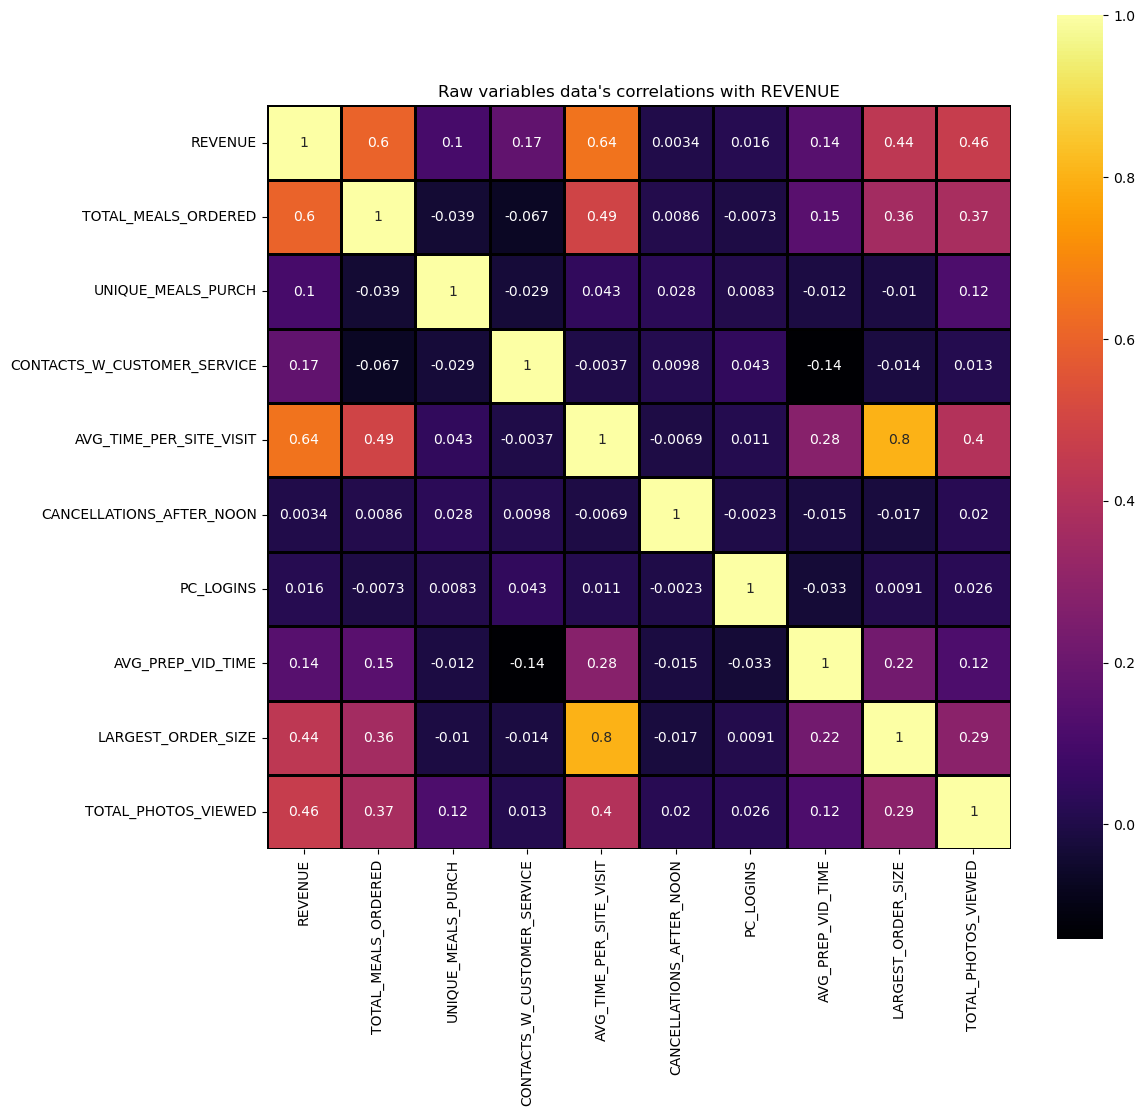

In [8]:
# Assigning the size of the heatmap:
fig, ax = plt.subplots(figsize = (12, 12))


sns.heatmap(data = chef_corr,    # Assigning the data source
            cmap = 'inferno',    # Assigning the color
            square = True,       # Assigning the shape of the heatmap
            annot = True,        # Assigning annotations
            linecolor = 'black', # Assigning the line color
            linewidths = 1.0)    # Assigning the line widths

plt.title("Raw variables data's correlations with REVENUE")
plt.show()  ### Showing the heatmap

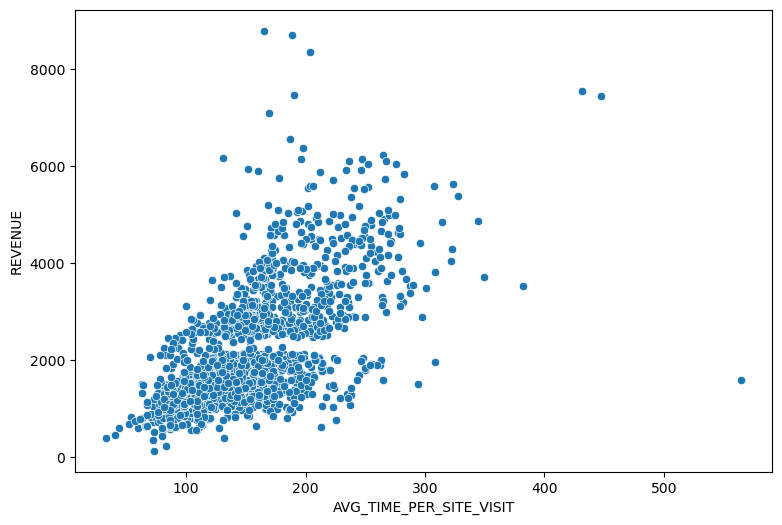

In [9]:
### Developing a Scatterplot with REVENUE and the variable with the strongest correlation with REVENUE

# Setting plot's size 
fig, ax = plt.subplots(figsize = (9, 6))


# Developing a scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = chef) 


# Showing the results
plt.show()


### As can be seen in the Scatterplot below about half of the datapoints are located between 50 and 200 time (assuming it's in seconds)
### Then the other half is more dispersed ranging from 100 to 300, but having 100 and 200 

In [10]:
### Creating as Base Model: ITERATION 1

# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs


### Looking for the variables that maximize the adjusted R-squared 

# INSTANTIATING a model object
lm_best = smf.ols(formula =  """REVENUE ~ AVG_TIME_PER_SITE_VISIT  + 
                                             TOTAL_MEALS_ORDERED +
                                             TOTAL_PHOTOS_VIEWED  +
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE +
                                             AVG_PREP_VID_TIME +
                                             UNIQUE_MEALS_PURCH +
                                             PC_LOGINS + 
                                             CANCELLATIONS_AFTER_NOON
                                             """,
                                data = chef) # Assigning data source


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     321.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:54:37   Log-Likelihood:                -15567.
No. Observations:                1946   AIC:                         3.115e+04
Df Residuals:                    1936   BIC:                         3.121e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [11]:
# Created a list of continuous features (including REVENUE)
continuous_data = ["REVENUE", 
                   "AVG_TIME_PER_SITE_VISIT",
                   "TOTAL_MEALS_ORDERED",
                   "CONTACTS_W_CUSTOMER_SERVICE", 
                   "UNIQUE_MEALS_PURCH",
                   "PC_LOGINS",
                   "MOBILE_LOGINS",
                   "CANCELLATIONS_AFTER_NOON", 
                   "PRODUCT_CATEGORIES_VIEWED"]

# creating a new feature by adding AVG_TIME_PER_SITE_VISIT and TOTAL_MEALS_ORDERED

continuous_data.append("AVG_TIME_VISIT_AND_MEALS_ORDERED")                  # adding variable defined below to the list
continuous_data.append("AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED")            # adding variable defined below to the list
continuous_data.append("AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE")             # adding variable defined below to the list
continuous_data.append("AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME")     # adding variable defined below to the list
continuous_data.append("UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED")  # adding variable defined below to the list
continuous_data.append("CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS")            # adding variable defined below to the list
continuous_data.append("CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS")        # adding variable defined below to the list
continuous_data.append("PC_LOGINS_AND_MOBILE_LOGINS")                       # adding variable defined below to the list



### This is the strongest feature engineered:
chef["AVG_TIME_VISIT_AND_MEALS_ORDERED"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["TOTAL_MEALS_ORDERED"]

### defining other features:
chef["AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["TOTAL_PHOTOS_VIEWED"]
chef["AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["LARGEST_ORDER_SIZE"]
chef["AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["AVG_PREP_VID_TIME"]
chef["UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED"] = chef["UNIQUE_MEALS_PURCH"] + chef["PRODUCT_CATEGORIES_VIEWED"]

### Defining other weak features:
chef["CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS"] = chef["CANCELLATIONS_AFTER_NOON"] + chef["PC_LOGINS"]
chef["CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS"] = chef["CANCELLATIONS_AFTER_NOON"] + chef["MOBILE_LOGINS"]
chef["PC_LOGINS_AND_MOBILE_LOGINS"] = chef["PC_LOGINS"] + chef["MOBILE_LOGINS"]




 
# Developed a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# Filtered the results to see only correlation scored with REVENUE
chef_corr.loc[:,"REVENUE"].round(decimals = 2).sort_values(ascending = False)

REVENUE                                             1.00
AVG_TIME_VISIT_AND_MEALS_ORDERED                    0.72
AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE               0.64
AVG_TIME_PER_SITE_VISIT                             0.64
TOTAL_MEALS_ORDERED                                 0.60
AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED              0.56
AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME       0.45
CONTACTS_W_CUSTOMER_SERVICE                         0.17
UNIQUE_MEALS_PURCH                                  0.10
UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED    0.09
MOBILE_LOGINS                                       0.07
PC_LOGINS_AND_MOBILE_LOGINS                         0.06
CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS          0.03
PRODUCT_CATEGORIES_VIEWED                           0.03
PC_LOGINS                                           0.02
CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS              0.01
CANCELLATIONS_AFTER_NOON                            0.00
Name: REVENUE, dtype: float64

In [12]:
for columns in chef :
    print(columns)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED
AVG_TIME_VISIT_AND_MEALS_ORDERED
AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED
AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE
AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME
UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS
CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS
PC_LOGINS_AND_MOBILE_LOGINS


In [13]:

# loading data from the database
chef = pd.read_excel('Apprentice_Chef_Dataset_2023.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# Showing only the first 5 rows
chef.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In the following cell, all variables including the ‘REVENUE’, and the rest of the x-variables used as explained before, have been transformed into logarithmic values. 

Creating logarithmic copies of the original variables has allowed us to compare them with the original ones and see which ones performed better. Log transformations help the skewness since as can be seen in the first histoplot of the script, the distribution was skewed to the right, but thanks to this log transformation of all the variables, got a better distribution making it more linear and therefore improving the analysis’ validity. 

In general, the original ones performed better in the regression models, except for one, ‘LOG_REVENUE’, which performed better than the original one, ‘REVENUE’. This is also one of the key points it allowed the later mentioned testing score to get very high and almost reach 0.8. 


In [14]:
### Droping log feature because they have values goin to the infinity 
# chef.drop('LOG_CANCELLATIONS_AFTER_NOON', axis=1, inplace=True)
# chef.drop('LOG_WEEKLY_PLAN', axis=1, inplace=True)


# log transforming Sale_Price and saving it to the dataset
chef['LOG_REVENUE'] = np.log(chef['REVENUE'])                                         # Log transforming feature
chef['LOG_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])                 # Log transforming feature
chef['LOG_UNIQUE_MEALS_PURCH'] = np.log(chef['UNIQUE_MEALS_PURCH'])                   # Log transforming feature
chef['LOG_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(chef['CONTACTS_W_CUSTOMER_SERVICE']) # Log transforming feature
chef['LOG_PRODUCT_CATEGORIES_VIEWED'] = np.log(chef['PRODUCT_CATEGORIES_VIEWED'])     # Log transforming feature
chef['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])         # Log transforming feature

### This log feature has been dropped because it has -infinity values
# chef['LOG_CANCELLATIONS_AFTER_NOON'] = np.log(chef['CANCELLATIONS_AFTER_NOON'])
chef['LOG_PC_LOGINS'] = np.log(chef['PC_LOGINS'])                                     # Log transforming feature
chef['LOG_MOBILE_LOGINS'] = np.log(chef['MOBILE_LOGINS'])                             # Log transforming feature

### This log feature has been dropped because it has -infinity values
# chef['LOG_WEEKLY_PLAN'] = np.log(chef['WEEKLY_PLAN'])
chef['LOG_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'])                     # Log transforming feature
chef['LOG_LARGEST_ORDER_SIZE'] = np.log(chef['LARGEST_ORDER_SIZE'])                   # Log transforming feature
chef['LOG_AVG_MEAN_RATING'] = np.log(chef['AVG_MEAN_RATING'])                         # Log transforming feature
chef['LOG_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'])                 # Log transforming feature

C:\Users\bromi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
### For loop to see all columns 
for columns in chef :
    print(columns)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED
LOG_REVENUE
LOG_TOTAL_MEALS_ORDERED
LOG_UNIQUE_MEALS_PURCH
LOG_CONTACTS_W_CUSTOMER_SERVICE
LOG_PRODUCT_CATEGORIES_VIEWED
LOG_AVG_TIME_PER_SITE_VISIT
LOG_PC_LOGINS
LOG_MOBILE_LOGINS
LOG_AVG_PREP_VID_TIME
LOG_LARGEST_ORDER_SIZE
LOG_AVG_MEAN_RATING
LOG_TOTAL_PHOTOS_VIEWED


Here the x-variables have been declared. To reach to this point of getting the optimal combination of variables, 5 different variable lists have been created and tested for each of the regression models explained below. The first combination of variables, which in fact is the one being used for the best-performing model’s scores, x_variabes, includes a mix of original variables as well as 5 feature-engineered ones. The ones used here are the following:   

-	'PC_LOGINS_AND_MOBILE_LOGINS': Even though this feature’s strength is very low this combination makes sense because their values are very similar and together can strengthen the regression a little bit. 

-	'CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS': This feature’s strength is very low too, but it also helped bring the regression scores up to the wanted point. 

-	'AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE': This feature has medium strength, and it also makes sense, because the more time spent on the site we would expect the order to be larger. 

-	'AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME': This follows the same logic as the one before, and it also has medium strength. 

-	'AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED': The same happens with this new feature, and it is in fact the strongest one among all of the medium-strength ones, and it drives the regression scores up the most. 

These don’t include all newly engineered features. In fact, only 5 of them have been used, in the x_variabes list, which is the data used to train the models used. 

This is the complete list of newly engineered features: 

-	"AVG_TIME_VISIT_AND_MEALS_ORDERED"
-	"AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED"
-	"AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE"
-	"AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME"
-	"UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED"
-	"AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE"
-	"CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS"
-	"CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS"
-	"PC_LOGINS_AND_MOBILE_LOGINS"

<h2> Declaring X variables <h2\>

In [33]:
# declaring sets of x-variables

### The x_variables list created below, is the one that has been used for the 

x_variables = ['TOTAL_MEALS_ORDERED',                        # Original feature added to the list  
            'UNIQUE_MEALS_PURCH',                            # Original feature added to the list
            'CONTACTS_W_CUSTOMER_SERVICE',                   # Original feature added to the list
            'PRODUCT_CATEGORIES_VIEWED',                     # Original feature added to the list
            'AVG_TIME_PER_SITE_VISIT',                       # Original feature added to the list
            'CANCELLATIONS_AFTER_NOON',                      # Original feature added to the list
            'PC_LOGINS',                                     # Original feature added to the list
            'MOBILE_LOGINS',                                 # Original feature added to the list
            'WEEKLY_PLAN',                                   # Original feature added to the list
            'AVG_PREP_VID_TIME',                             # Original feature added to the list
            'LARGEST_ORDER_SIZE',                            # Original feature added to the list
            'AVG_MEAN_RATING',                               # Original feature added to the list
            'TOTAL_PHOTOS_VIEWED',                           # Original feature added to the list
            'PC_LOGINS_AND_MOBILE_LOGINS',                   # Engineered feature added to the list
            'CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS',    # Engineered feature added to the list
            'AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE',         # Engineered feature added to the list
            'AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME', # Engineered feature added to the list
            'AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED']        # Engineered feature added to the list


### Other variables created: 

x_variables_2 = ['LOG_TOTAL_MEALS_ORDERED',   # log feature added to the list
        'LOG_UNIQUE_MEALS_PURCH',             # log feature added to the list
        'LOG_CONTACTS_W_CUSTOMER_SERVICE',    # log feature added to the list
        'LOG_PRODUCT_CATEGORIES_VIEWED',      # log feature added to the list
        'LOG_AVG_TIME_PER_SITE_VISIT',        # log feature added to the list
        'LOG_PC_LOGINS',                      # log feature added to the list
        'LOG_MOBILE_LOGINS',                  # log feature added to the list
        'LOG_AVG_PREP_VID_TIME',              # log feature added to the list
        'LOG_LARGEST_ORDER_SIZE',             # log feature added to the list
        'LOG_AVG_MEAN_RATING',                # log feature added to the list
        'LOG_TOTAL_PHOTOS_VIEWED']            # log feature added to the list


x_variables_3 = ['LOG_TOTAL_MEALS_ORDERED',   # log feature added to the list
        'LOG_UNIQUE_MEALS_PURCH',             # log feature added to the list
        'LOG_PRODUCT_CATEGORIES_VIEWED',      # log feature added to the list
        'LOG_AVG_TIME_PER_SITE_VISIT',        # log feature added to the list
        'LOG_AVG_PREP_VID_TIME',              # log feature added to the list
        'LOG_LARGEST_ORDER_SIZE',             # log feature added to the list
        'LOG_AVG_MEAN_RATING',                # log feature added to the list
        'LOG_TOTAL_PHOTOS_VIEWED']            # log feature added to the list


### Data ieration with new variables 
x_variables_4 = ['AVG_TIME_VISIT_AND_MEALS_ORDERED',       # Engineered feature added to the list
                 'TOTAL_MEALS_ORDERED',
                 'AVG_TIME_PER_SITE_VISIT',  
                 'LARGEST_ORDER_SIZE', 
                 'TOTAL_PHOTOS_VIEWED',
                 'AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE',  # Engineered feature added to the list
                 'AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED'  # Engineered feature added to the list
                ]


x_variables_5 = [ 'AVG_TIME_VISIT_AND_MEALS_ORDERED',         # Engineered feature added to the list
                   'AVG_TIME_PER_SITE_VISIT',                 # Original feature added to the list
                   'TOTAL_MEALS_ORDERED',                     # Original feature added to the list
                   'CONTACTS_W_CUSTOMER_SERVICE',             # Original feature added to the list
                   'UNIQUE_MEALS_PURCH',                      # Original feature added to the list
                   'PC_LOGINS',                               # Original feature added to the list
                   'MOBILE_LOGINS',                           # Original feature added to the list
                   'CANCELLATIONS_AFTER_NOON',                # Original feature added to the list
                   'PRODUCT_CATEGORIES_VIEWED',               # Original feature added to the list
                   'AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED']  # Engineered feature added to the list


# creating a new feature by adding AVG_TIME_PER_SITE_VISIT and TOTAL_MEALS_ORDERED
x_variables_5.append("AVG_TIME_VISIT_AND_MEALS_ORDERED")                 # Appending variable to the x_variables list
x_variables_5.append("AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED")           # Appending variable to the x_variables list
x_variables_5.append("AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE")            # Appending variable to the x_variables list
x_variables_5.append("AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME")    # Appending variable to the x_variables list
x_variables_5.append("UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED") # Appending variable to the x_variables list
x_variables_5.append("CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS")           # Appending variable to the x_variables list
x_variables_5.append("CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS")       # Appending variable to the x_variables list
x_variables_5.append("PC_LOGINS_AND_MOBILE_LOGINS")                      # Appending variable to the x_variables list



### Although this is the strongest feature engineered, it hasn't been used, in order to stay between the instructed testing and gap scores
chef["AVG_TIME_VISIT_AND_MEALS_ORDERED"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["TOTAL_MEALS_ORDERED"]

### Other features:
chef["AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["TOTAL_PHOTOS_VIEWED"]
chef["AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["LARGEST_ORDER_SIZE"]
chef["AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["AVG_PREP_VID_TIME"]
chef["UNIQUE_MEALS_PURCH_AND_PRODUCT_CATEGORIES_VIEWED"] = chef["UNIQUE_MEALS_PURCH"] + chef["PRODUCT_CATEGORIES_VIEWED"]
chef["AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE"] = chef["AVG_TIME_PER_SITE_VISIT"] + chef["LARGEST_ORDER_SIZE"]

### Other weak features:
chef["CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS"] = chef["CANCELLATIONS_AFTER_NOON"] + chef["PC_LOGINS"]
chef["CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS"] = chef["CANCELLATIONS_AFTER_NOON"] + chef["MOBILE_LOGINS"]
chef["PC_LOGINS_AND_MOBILE_LOGINS"] = chef["PC_LOGINS"] + chef["MOBILE_LOGINS"]


<h2> Setting up scikitlearn and assigning data <h2\>

When it comes to applying everything together, we need to run regression models. In this case, 6 different models have been applied. Many iterations and changes have been made in the x_varaibles list mentioned above, but also in the ‘max_depth’ parameter in the best-performing model the ‘Pruned Random Forest’. 

In [17]:
# Setting up scikit-learn

# preparing x-variables from the OLS model 

### Telling Python which x data we use
x_data = chef[x_variables]


# preparing response variable
# y_data      = chef['REVENUE']
log_y_data = chef['LOG_REVENUE'] # LOG_REVENUE has been used instead of REVENUE, because logged REVENUE gives us better scores


###############################################
## setting up more than one train-test split ##
###############################################

### Better to keep 'x' small, not caps
x_train, x_test, y_train, y_test = train_test_split( x_data, # x-variables 
                                                     log_y_data, # y-variable  
                                                     test_size    = 0.25, # Put 25% of the data on the test side
                                                     random_state = 219 ) # Setting 219 as random state as specified

In [18]:
# Setting the name of the model
model_name = "Linear Regression (log-y)"


# INSTANTIATING a model object 
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on our new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Displayed results of the model
print('The Training Score : ', model_train_score)
print('The Testing Score  : ', model_test_score)
print('The Train-Test Gap : ', model_gap)

### It doesn't really matter if training or testing stores are higher than the other

The Training Score :  0.6348
The Testing Score  :  0.6384
The Train-Test Gap :  0.0036


In [19]:
## Model Example 2 (log_Sale_Price) ##

# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula =   """REVENUE ~ TOTAL_MEALS_ORDERED + 
                                UNIQUE_MEALS_PURCH + 
                                CONTACTS_W_CUSTOMER_SERVICE +  
                                PRODUCT_CATEGORIES_VIEWED + 
                                AVG_TIME_PER_SITE_VISIT + 
                                CANCELLATIONS_AFTER_NOON +
                                PC_LOGINS +
                                MOBILE_LOGINS +
                                WEEKLY_PLAN +
                                AVG_PREP_VID_TIME +
                                LARGEST_ORDER_SIZE +
                                AVG_MEAN_RATING +
                                TOTAL_PHOTOS_VIEWED +
                                PC_LOGINS_AND_MOBILE_LOGINS +
                                CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS +
                                AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE +
                                AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME +
                                AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED""",
                                data = chef) # Specifying the data source



# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     250.7
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:54:38   Log-Likelihood:                -15494.
No. Observations:                1946   AIC:                         3.102e+04
Df Residuals:                    1932   BIC:                         3.109e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       943.0226    227.761      4.140      0.000     496.339    1389.706
TOTAL_MEALS_ORDERED                               6.3482      0.349     18.172      0.000       5.663       7.033
UNIQUE_MEALS_PURCH                               38.9494      7.044      5.530      0.000      25.136      52.763
CONTACTS_W_CUSTOMER_SERVICE                      80.1447      6.468     12.390      0.000      67.459      92.830
PRODUCT_CATEGORIES_VIEWED                         8.5434      5.205      1.641      0.101      -1.665      18.752
AVG_TIME_PER_SITE_VISIT                          27.3498      3.668      7.457      0.000      20.156      34.543
CANCELLATIONS_AFTER_NOON                        -20.0784     10.435     -1.924      0.054     -40.543       0.386
PC_LOGINS                                       -17.4109     18.741     -0.929      0.353     -54.166      19.344
MOBILE_LOGINS                                    35.0725     16.886      2.077      0.038       1.957      68.188
WEEKLY_PLAN                                       0.2005      1.168      0.172      0.864      -2.090       2.491
AVG_PREP_VID_TIME                               -13.8299      1.844     -7.501      0.000     -17.446     -10.214
LARGEST_ORDER_SIZE                              -71.4373     10.527     -6.786      0.000     -92.083     -50.792
AVG_MEAN_RATING                                -365.8110     30.623    -11.946      0.000    -425.868    -305.754
TOTAL_PHOTOS_VIEWED                             -13.2683      1.837     -7.221      0.000     -16.872      -9.665
PC_LOGINS_AND_MOBILE_LOGINS                      17.6617     12.816      1.378      0.168      -7.474      42.797
CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS       14.9941      9.051      1.657      0.098      -2.756      32.744
AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE           -44.0876      6.864     -6.423      0.000     -57.550     -30.625
AVG_TIME_PER_SITE_VISIT_AND_AVG_PREP_VID_TIME    13.5199      1.834      7.373      0.000       9.924      17.116
AVG_TIME_VISIT_AND_TOTAL_PHOTOS_VIEWED           14.0815      1.832      7.687      0.000      10.489      17.674
==============================================================================
Omnibus:                      666.061   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8067.228
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                      12.654   Cond. No.                     6.00e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [20]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center') # Alligning to the cebter
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")                                        # Creating x_label for "Feature Importance"
    plt.ylabel("Feature")                                                   # Creating y_label for "Feature Importance"
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [21]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # This allows us to use R-square
model_test_score  = model.score(x_test, y_test).round(4)   # This allows us to use R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('TRAINING SCORE :', model_train_score)
print('TESTING SCORE :', model_test_score)
print('TRAIN-TEST GAP :', model_gap)

TRAINING SCORE : 1.0
TESTING SCORE : 0.5001
TRAIN-TEST GAP : 0.4999


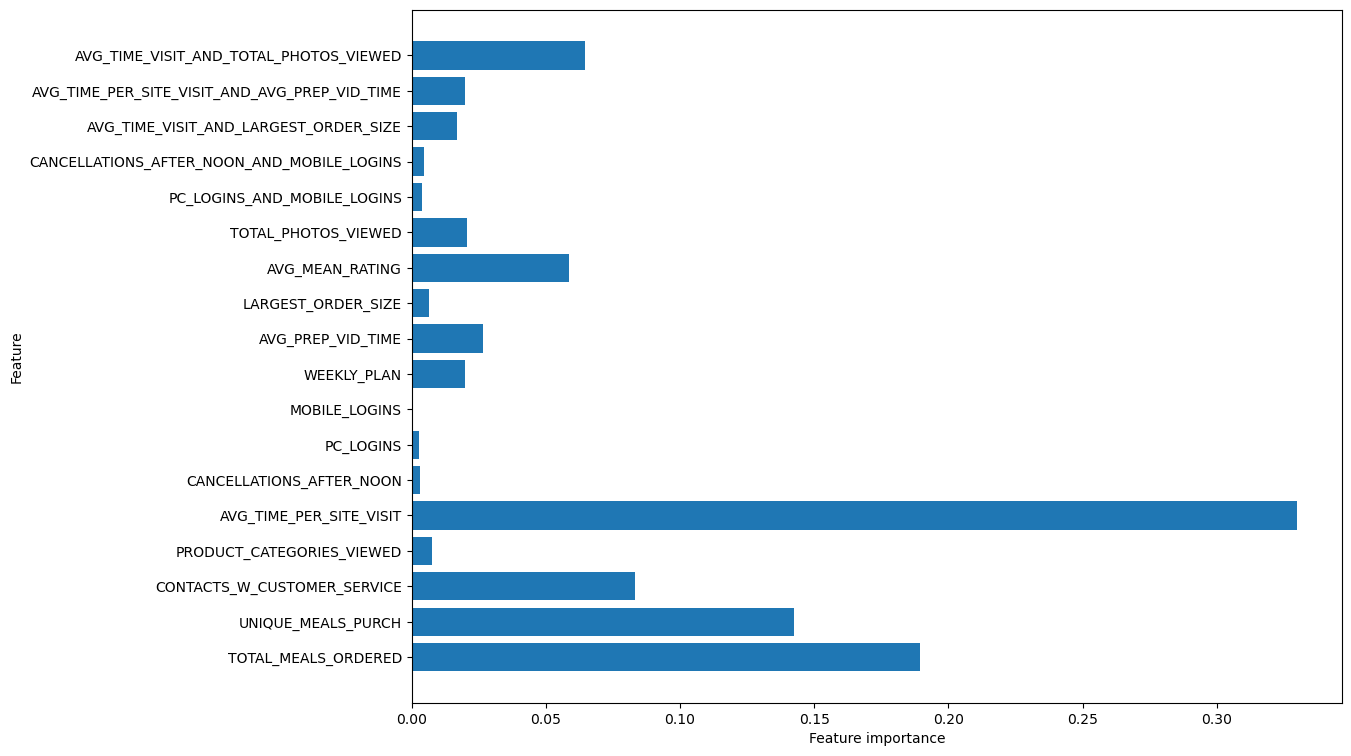

In [22]:
# plotting feature importance
plot_feature_importances(model          ,
                         train = x_train,
                         export = False )

In [23]:
# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,             # Assigning learning_rate
                                  n_estimators  = 100,             ### Number of trees we are building
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,               # Assigning max_depth
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # This allows us to use R-square
model_test_score  = model.score(x_test, y_test).round(4)   # This allows us to use R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('TRAINING SCORE :', model_train_score)
print('TESTING SCORE :', model_test_score)
print('TRAIN-TEST GAP :', model_gap)

TRAINING SCORE : 0.8979
TESTING SCORE : 0.8111
TRAIN-TEST GAP : 0.0868


In [34]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on our new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # This allows us to use R-square
model_test_score  = model.score(x_test, y_test).round(4)   # This allows us to use R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Displayed results of the model
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.5291
Train-Test Gap : 0.4709


In [25]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object 
model = DecisionTreeRegressor(max_depth        = 4, ### This is to set the maximum number of iterations ("four braches"), so it doesn't get us too many and the model becomes unreadable (because instead, you are just subsetting and clustering each branch into smaller ones)
                              min_samples_leaf = 25,
                              random_state     = 219)

# FITED to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # This allows us to use R-square
model_test_score  = model.score(x_test, y_test).round(4)   # This allows us to use R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Displaying the model's results:
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7078
Testing Score  : 0.6692
Train-Test Gap : 0.0386


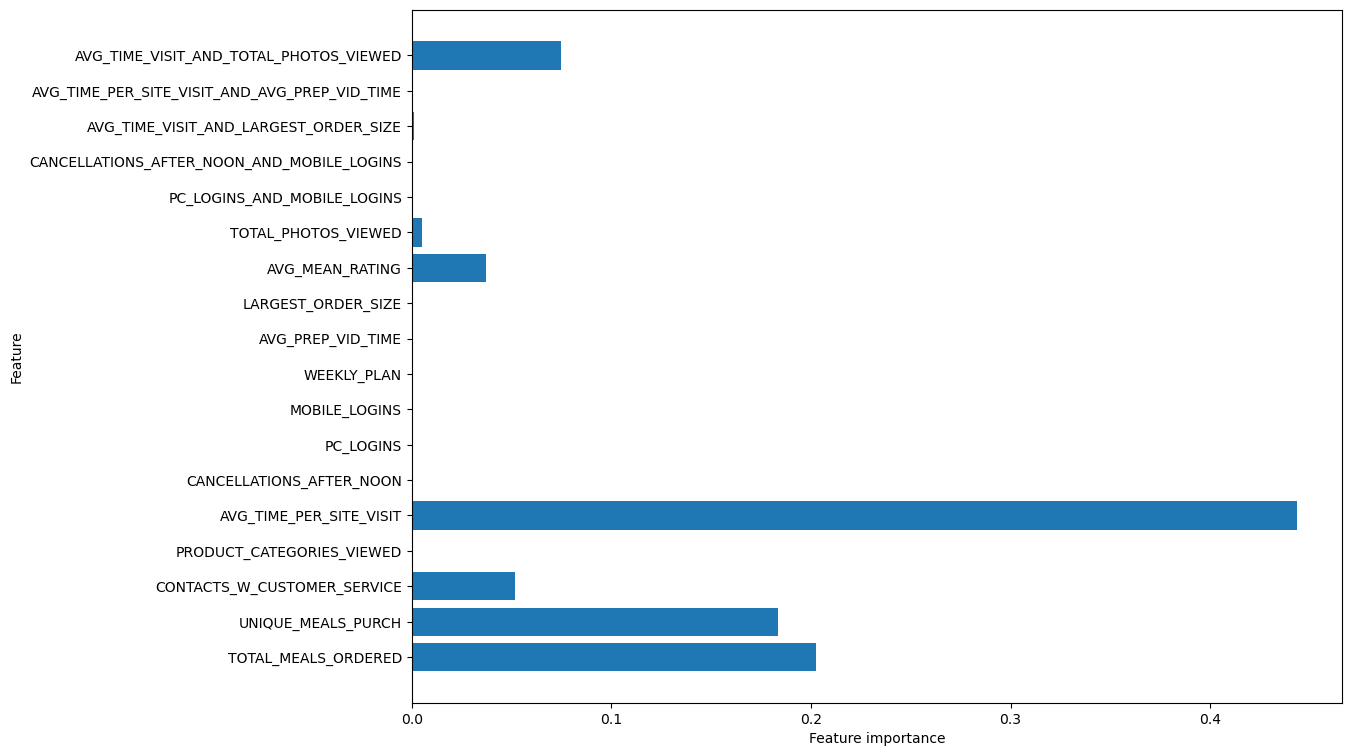

In [26]:
# This plot shows us each feature's importance

plot_feature_importances(model,
                         train = x_train,
                         export = False)

<h2> Chosen Model (Best-Performing Model): Pruned Random Forest <h2\>

The best-performing model as mentioned is the Pruned Random Forest, which gave us excellent scores. 

-	Training score: 0.8433
-	Testing Score: 0.7984
-	Train-Test GAP: 0.0449

Thanks to the testing score being high and almost reaching 0.8, this means the model is able to accurately predict the y-variable, in this case, ‘REVENUE’, based on the x-variables provided and trained the model with, as well as explained above. 

In [30]:
# Labeling model to 'Pruned Random Forest'
model_name_PRF = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 200,   # Setting n_estimators
                              criterion        = 'mse', # Setting criterion
                              max_depth        = 200,   # Setting max_depth
                              min_samples_leaf = 14,    # Setting min_samples_leaf
                              bootstrap        = True,  # Setting bootstrap
                              warm_start       = False, # Setting warm_start
                              random_state     = 219)   # Setting random_state


# FITTED the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_PRF = model.score(x_train, y_train).round(4) # This allows us to use R-square
model_test_score_PRF  = model.score(x_test, y_test).round(4)   # This allows us to use R-square
model_gap_PRF         = abs(model_train_score - model_test_score).round(4)


# displaying results

prf_model =  f"""\
Model Type:     {model_name_PRF}
Train_Score:    {model_train_score_PRF}
Test_Score:     {model_test_score_PRF}
Train-Test Gap: {model_gap_PRF} """

print(prf_model) # Printing prf_model

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Model Name:     Pruned Random Forest
Train_Score:    0.8433
Test_Score:     0.7984
Train-Test Gap: 0.0386 


To conclude, from a business standpoint, Apprentice Chef, should focus on the strongest variables represented in the graph below. There are two main ones, ‘AVG_TIME_PER_SITE_VISIT’, and ‘TOTAL_MEALS_ORDERED’. As can be seen, these two together represent 60 percent of the importance, meaning it they both contribute the most for revenue to increase. 

That said, in order for the business to learn from this data, the key takeaways are that the more time users spend on the site the more they’ll spend on it, as well as the more meals ordered the more revenue this will generate. But also, some key learnings are that even though ‘UNIQUE_MEALS_PURCH’, ‘CONTACTS_W_CUSTOMER_SERVICE’, ‘AVG_TIME_VISIT_AND_LARGEST_ORDER_SIZE’, and ‘AVG_MEAN_RATING’ have relatively lower importance compared the 2 main ones, they also positively contribute to the testing score going up, and therefore should also be taken into consideration to develop further to increase the revenue. 

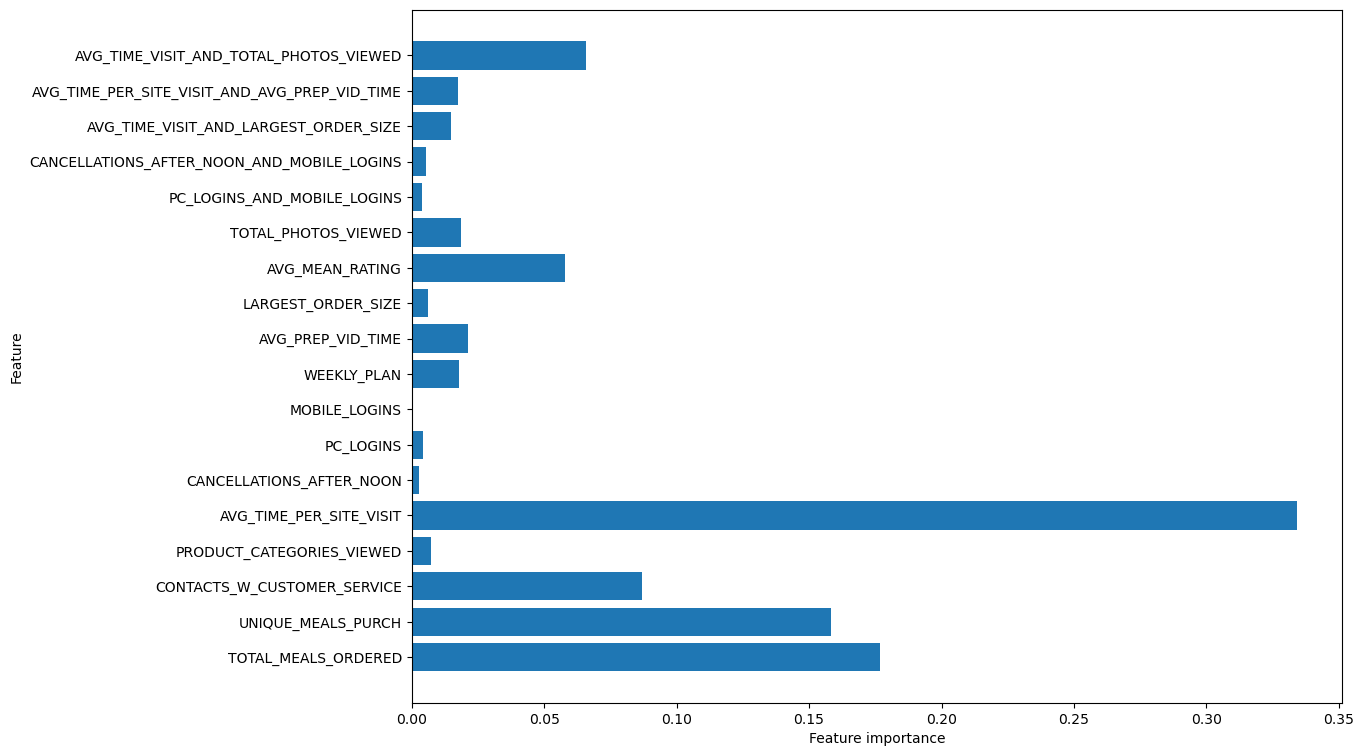

In [35]:
# This plot shows us each feature's importance

plot_feature_importances(model,
                         train = x_train,
                         export = False)

In [29]:
######### FINAL RESULT #########

prf_model =  f"""\
Model Type:     {model_name_PRF} 
Train_Score:    {model_train_score_PRF}
Test_Score:     {model_test_score_PRF}
Train-Test Gap: {model_gap_PRF} """

print(prf_model) # Printing the prfmodel

Model Type:     Pruned Random Forest
Train_Score:    0.8433
Test_Score:     0.7984
Train-Test Gap: 0.0386 
